### Rossman Sales Prediction

Abstract:
    The main aim of the notebook is to predict Sales price of various Store Types of Rossman. The Dataset consists  of various factors such as number of customers for each store,no of 1st promotion offered by the store,Number of Stores that offer 2nd promotion followed by 1st promotion,Effect of Sales due to School& State Holiday,distance of Competition Stores from the current store that effect the Sales of the store.

Steps:
1) Data Cleaning
2) Exploratory Data Analysis
3) Feature Selection
4) Model Building

### 1. Import Packages

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#import plotly 
import plotly.graph_objs as go
import sklearn
import warnings

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore")

### 2. Data Preparation

In [303]:
# Load Datasets from the folder
import zipfile
zf = zipfile.ZipFile(r"C:\Users\sharmi\Desktop\IIIT-B\FinalProject\Dataset.zip")
store = pd.read_csv(zf.open('store.csv'))
train = pd.read_csv(zf.open('train.csv'))

In [304]:
data = pd.DataFrame(train)
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [305]:
# modify the date format
data['Date'] = pd.to_datetime(data.Date)
data.head().append(data.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [306]:
# sort date to bring oldest first
data= data.sort_values(by= ['Date','Store'])
data= data.reset_index(drop= True)
data.head().append(data.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2013-01-01,0,0,0,0,a,1
1,2,2,2013-01-01,0,0,0,0,a,1
2,3,2,2013-01-01,0,0,0,0,a,1
3,4,2,2013-01-01,0,0,0,0,a,1
4,5,2,2013-01-01,0,0,0,0,a,1
1017204,1111,5,2015-07-31,5723,422,1,1,0,1
1017205,1112,5,2015-07-31,9626,767,1,1,0,1
1017206,1113,5,2015-07-31,7289,720,1,1,0,1
1017207,1114,5,2015-07-31,27508,3745,1,1,0,1
1017208,1115,5,2015-07-31,8680,538,1,1,0,1


In [307]:
#inspect the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [308]:
store.head().append(store.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [309]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

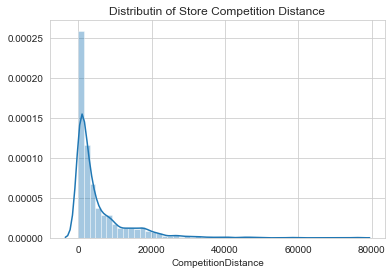

In [310]:
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

From the graph, we observed the distribution is right skewed, so we'll replace missing values with the median.

In [311]:
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

In [312]:
# fillna in store with 0
store.fillna(0, inplace=True)

In [313]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


#### Filter stores - 1,3,8,9,13,25,29,31 and 46

In [314]:
stores = [1,3,8,9,13,25,29,31,46]
data = data[data.Store.isin(stores)]
data.head(9)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2013-01-01,0,0,0,0,a,1
2,3,2,2013-01-01,0,0,0,0,a,1
7,8,2,2013-01-01,0,0,0,0,a,1
8,9,2,2013-01-01,0,0,0,0,a,1
12,13,2,2013-01-01,0,0,0,0,a,1
24,25,2,2013-01-01,0,0,0,0,a,1
28,29,2,2013-01-01,0,0,0,0,a,1
30,31,2,2013-01-01,0,0,0,0,a,1
45,46,2,2013-01-01,0,0,0,0,a,1


In [315]:
# drop rows with Shop is closed (open value 0) or Sales is zero.
data = data.loc[~(data['Sales']==0)]

# evaluate the number of rows left in each store
data.Store.value_counts().sort_index()

1     781
3     779
8     784
9     779
13    621
25    750
29    779
31    784
46    622
Name: Store, dtype: int64

In [316]:
data.shape

(6679, 9)

In [317]:
# inspect any rows with Sales value as 0
data[data['Sales']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [318]:
data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64